In [ ]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


60


Text(0.5, 1.0, 'galaxy distance versus red shift ')

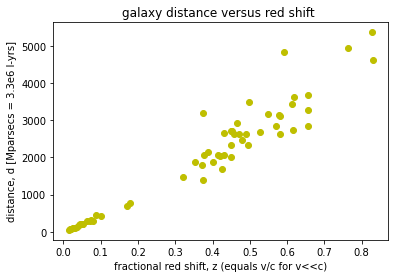

In [ ]:
#hubbledata = np.loadtxt("/content/drive/MyDrive/Courses/phy508/hubble-low-z.txt")
hubbledata = np.loadtxt("/content/drive/MyDrive/Courses/phy508/hubble.txt")

x = hubbledata[:,0]
y = hubbledata[:,1]
N = x.size
print(N)

plt.plot( x, y, 'yo')
plt.xlabel("fractional red shift, z (equals v/c for v<<c)" )
plt.ylabel("distance, d [Mparsecs = 3.3e6 l-yrs]")
plt.title('galaxy distance versus red shift ')

slope =  5757.255303529275  +/-  217.80005915132475
offset =  -128.9300592460686  +/-  94.05146078889815
chisq/ndf 158654.05544846723


Text(0.5, 1.0, 'galaxy distance versus red shift ')

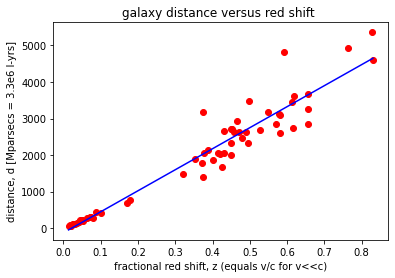

In [ ]:
M = np.column_stack( (x,np.ones(N)))             # define matrix M

MTM = np.dot( M.transpose(), M)                  # 2x2 matrix 
MTMINV = np.linalg.inv(MTM)                      # 2x2 matrx
MTY = np.dot(M.transpose(),y)                    # 2-element vector
pars = np.dot(MTMINV,MTY)                        # calc best fit parameters

yf = pars[0]*x + pars[1] 
residuals = yf-y
chisq = np.sum(residuals**2)
var = chisq / (N-2)
covs = MTMINV*var

print("slope = ",pars[0]," +/- ",np.sqrt(covs[0,0]))
print("offset = ",pars[1]," +/- ",np.sqrt(covs[1,1]))
print("chisq/ndf",var)

plt.plot(x,y,'ro')
plt.plot(x,yf,"b-")
plt.xlabel("fractional red shift, z (equals v/c for v<<c)" )
plt.ylabel("distance, d [Mparsecs = 3.3e6 l-yrs]")
plt.title('galaxy distance versus red shift ')

slope =  5757.255296440335  +/-  0.546804882401647
offset =  -128.93005571463385  +/-  0.23612390187109727
chisq/ndf 158654.05544846717


Text(0.5, 1.0, 'galaxy distance versus red shift ')

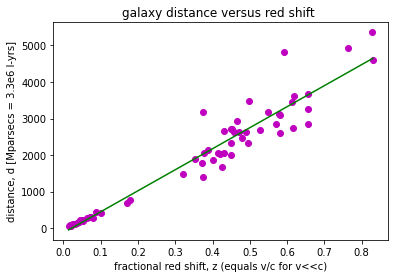

In [ ]:
def func(x, p1, p2):
    return p1*x+p2
    
pars, covs = fit.curve_fit(func, x, y, absolute_sigma=True)

yf =  pars[0]*x + pars[1] 
residuals = yf-y
chisq = np.sum(residuals**2)
var = chisq / (N-2)

print("slope = ",pars[0]," +/- ",np.sqrt(covs[0,0]))
print("offset = ",pars[1]," +/- ",np.sqrt(covs[1,1]))
print("chisq/ndf",var)

plt.plot(x,y,'mo')
plt.plot(x,yf,"g-")
plt.xlabel("fractional red shift, z (equals v/c for v<<c)" )
plt.ylabel("distance, d [Mparsecs = 3.3e6 l-yrs]")
plt.title('galaxy distance versus red shift ')